## decision tree gini index

### Decision Tree 분리기준(Split Criterion)
- 부모 마디(노드)로부터 자식 마디(노드)들이 형성될 때, 생성된 자식 노드에 속하는 자료의
 순수도(Purity)가 가장 크게 증가하도록 트리를 형성하며 진행
- 입력 변수를 이용해 목표 변수의 분포를 얼마나 잘 구별하는 정도를 파악해
 자식 마디가 형성되는데, 목표 변수의 구별 정도를
 불순도(Impurity, 다양한 범주들의 개체들이 포함되어 있는 정도)에 의해 측정

### 종류
1. Entopy
1. Gini Index
1. (Misclassification Error)


### 지니 지수(Gini Index)
- 데이터 집합의 불순도를 측정
- 지니 지수는 0~1 사이의 값을 가지며, 어떤 데이터 집합에 속한 개체(레코드)들이
 같은 범주(클래스)로 구성되어 있으면 지니 지수는 최솟값이 0을 갖고
 해당 데이터 집합은 순수하다고 볼 수 있음
- 즉, 지니 지수가 작을수록 잘 분류된 것으로 볼 수 있음

- G = 1 - sigma(P(j)**2) = 1 - sigma((nj/n)**2)
- (sigma j=1부터 c까지,   c: 범주(클래스) 수, P(j): j번째 클래스에 분류될 확률,
    n = 노드에 속하는 개체 수,   nj = 노드에 속하는 수 중 j 번째 클래스에 속하는 개체 수)

## play tennis

In [1]:
# 모델 성능 평가 패키지
from sklearn.metrics import classification_report, confusion_matrix

# data set을 training set / test set 분리 서브 패키지
from sklearn.model_selection import train_test_split

# 의사결정트리 알고리즘 서브 패키지
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# IPython 내 정보 보여주는 API, raw 데이터가 있는 png jpeg 이미지 객체 만드는 모듈
from IPython.display import Image

import pandas as pd
import numpy as np

# 그래프 생성 graphviz의 Dot 언어를 파이썬 인터페이스에 제공하는 모듈
import pydotplus

# Operating System과 상호작용하기 위한 기본적 기능(경로 생성, 변경)이 제공되는 모듈
import os

In [17]:
tennis_data = pd.read_csv('./data/play_tennis.csv')
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [18]:
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny',0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast',1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain',2)
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,Hot,High,Weak,No
1,0,Hot,High,Strong,No
2,1,Hot,High,Weak,Yes
3,2,Mild,High,Weak,Yes
4,2,Cool,Normal,Weak,Yes
5,2,Cool,Normal,Strong,No
6,1,Cool,Normal,Strong,Yes
7,0,Mild,High,Weak,No
8,0,Cool,Normal,Weak,Yes
9,2,Mild,Normal,Weak,Yes


In [19]:
tennis_data.Temperature = tennis_data.Temperature.replace('Hot', 1)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild', 2)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool', 3)

In [20]:
tennis_data.Humidity = tennis_data.Humidity.replace('High', 1)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal', 2)

In [21]:
tennis_data.Wind = tennis_data.Wind.replace('Weak', 1)
tennis_data.Wind = tennis_data.Wind.replace('Strong', 2)

In [22]:
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No', 0)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes', 1)
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,1,1,0
1,0,1,1,2,0
2,1,1,1,1,1
3,2,2,1,1,1
4,2,3,2,1,1
5,2,3,2,2,0
6,1,3,2,2,1
7,0,2,1,1,0
8,0,3,2,1,1
9,2,2,2,1,1


In [23]:
X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook', 'Temperature', 'Humidity', 'Wind']))
X

array([[0, 1, 1, 1],
       [0, 1, 1, 2],
       [1, 1, 1, 1],
       [2, 2, 1, 1],
       [2, 3, 2, 1],
       [2, 3, 2, 2],
       [1, 3, 2, 2],
       [0, 2, 1, 1],
       [0, 3, 2, 1],
       [2, 2, 2, 1],
       [0, 2, 2, 2],
       [1, 2, 1, 2],
       [1, 1, 2, 1],
       [2, 2, 1, 2]], dtype=int64)

In [24]:
y = np.array(pd.DataFrame(tennis_data, columns = ['PlayTennis']))
y

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train

array([[2, 3, 2, 1],
       [1, 3, 2, 2],
       [2, 2, 1, 2],
       [2, 2, 1, 1],
       [0, 1, 1, 1],
       [0, 2, 2, 2],
       [2, 2, 2, 1],
       [2, 3, 2, 2],
       [0, 3, 2, 1],
       [1, 1, 1, 1]], dtype=int64)

In [26]:
X_test

array([[0, 1, 1, 2],
       [1, 1, 2, 1],
       [0, 2, 1, 1],
       [1, 2, 1, 2]], dtype=int64)

In [27]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)

In [28]:
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
dt_prediction = dt_clf.predict(X_test)

In [30]:
dt_prediction

array([1, 1, 1, 1], dtype=int64)

In [31]:
y_test

array([[0],
       [1],
       [0],
       [1]], dtype=int64)

## Confusion matrix:모델의 예측 결과와 성능 살펴볼 수 있는 척도
- TP (True Positive): 실제 yes 예측 yes
- FN (False Negative): 실제 yes 예측 no
- FP (False Positive): 실제 no 예측 yes
- TN (True Negative): 실제 no 예측 no
### Accuracy (정확도): TP + TN / TP + TN + FP + FN
- 한계: 2 class 문제에서 class yes 데이터 9900건, class no 데이터 100건일 경우, 모든 데이터 class yes 예측할 때 class no 예측 하나도 못해도 accuracy는 9900/10000 = 99%가 된다
### Precision (정밀도): TP / TP + FP
- 모델이 검출한 데이터 중 올바르게 검출된 데이터의 비율
### Recall (재현율): TP / TP + FN
- 실제 해당 데이터 중 모델이 올바르게 검출한 데이터의 비율
### F-Measure(F) = 2TP / 2TP + FN + FP 
- Precision + Recall. 두 수치의 trade-off 관계를 통합해 하나의 수치로 정확도 도출

## ROC (Receiver Operating Characteristic)
- ROC curve의 Y축에 TP, X축에 FP 수치를 입력해 두 수치의 균형 살펴볼 수 있음.
- 각 모델의 성능은 ROC curve 상의 한 점으로 표현
### Sensitivity (민감도, TPR(True Positive Rate)): TP / TP + FN         == Recall
- 실제 yes 중 예측이 맞춘 yes
###  FPR(False Positive Rate): FP / FP + TN
- 실제 no 중 예측이 yes라고 드립다 한 비율
### Specificity (특이도): TN / TN + FP
- 실체 no 중 예측이 맞춘 no

In [32]:
np.array([["TN", "FP"],["FN", "TP"]])  # confusion_matrix 결과값

array([['TN', 'FP'],
       ['FN', 'TP']], dtype='<U2')

In [33]:
print(confusion_matrix(y_test, dt_prediction))

[[0 2]
 [0 2]]


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test, dt_prediction)
precision = precision_score(y_test, dt_prediction)
recall = recall_score(y_test, dt_prediction)
f1 = f1_score(y_test, dt_prediction)
roc_auc = roc_auc_score(y_test, dt_prediction)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.
      format(accuracy, precision, recall, f1, roc_auc))

정확도: 0.5000, 정밀도: 0.5000, 재현율: 1.0000, F1: 0.6667, AUC: 0.5000


In [35]:
print('{:.3f}'.format(2.33414))

2.334


In [36]:
os.environ['PATH'] += os.pathsep + "C:/python_edu/program/Graphviz/bin"

# IPython 내에서 그래프를 생성할 수 있는 인터페이스 경로 추가 설정하는 부분.
# Graphviz2.38이 설치되고 bin 폴더가 있는 경로인 ‘C:\Program Files(x86)/Graphviz2.38/bin/’를 os 모듈 중
#  경로 구분 기호를 반환하는 함수인 os.pathsep을 이용해, 환경변수들을 나타내는 사전 함수 인
#  os.environ[‘PATH’]에 동적으로 할당해 저장

In [37]:
os.environ["PATH"]

'C:\\ProgramData\\Anaconda3\\envs\\python_edu;C:\\ProgramData\\Anaconda3\\envs\\python_edu\\Library\\mingw-w64\\bin;C:\\ProgramData\\Anaconda3\\envs\\python_edu\\Library\\usr\\bin;C:\\ProgramData\\Anaconda3\\envs\\python_edu\\Library\\bin;C:\\ProgramData\\Anaconda3\\envs\\python_edu\\Scripts;C:\\Program Files\\Java\\jdk1.8.0_211\\bin;C:\\ProgramData\\Anaconda3;C:\\ProgramData\\Anaconda3\\Library\\mingw-w64\\bin;C:\\ProgramData\\Anaconda3\\Library\\usr\\bin;C:\\ProgramData\\Anaconda3\\Library\\bin;C:\\ProgramData\\Anaconda3\\Scripts;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Program Files (x86)\\NAT Service;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\;C:\\Windows\\System32\\OpenSSH\\;C:\\Program Files\\IBM\\SPSS\\Statistics\\25\\JRE\\bin;C:\\Program Files\\Microsoft VS Code\\bin;C:\\Program Files\\Intel\\WiFi\\bin\\;C:\\Program Files\\Common Files\\Intel\\WirelessCommon\\;C:\\Program Files\\Java\\jd

In [38]:
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
feature_names = tennis_data.columns.tolist()
feature_names = feature_names[0:4]
target_name = np.array(["Play No", "Play Yes"])

In [40]:
len(feature_names)

4

In [41]:
feature_names

['Outlook', 'Temperature', 'Humidity', 'Wind']

In [43]:
target_name

array(['Play No', 'Play Yes'], dtype='<U8')

In [44]:
dt_dot_data = sklearn.tree.export_graphviz(dt_clf, out_file=None,
                                  feature_names= feature_names,
                                  class_names = target_name,
                                  filled=True, rounded=True,
                                  special_characters=True)

In [45]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

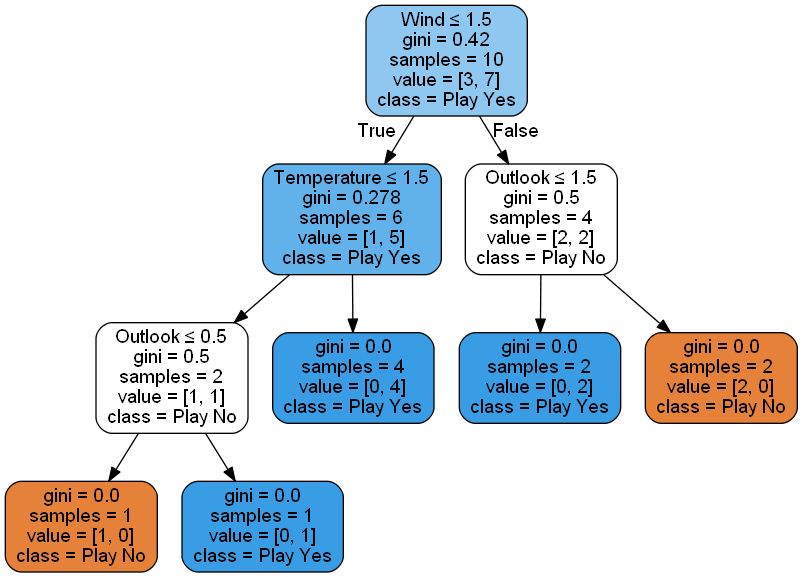

In [46]:
Image(dt_graph.create_png())


# kaggle 신용카드 사기 검출

In [4]:
# 모델 성능 평가 패키지
from sklearn.metrics import classification_report, confusion_matrix

# data set을 training set / test set 분리 서브 패키지
from sklearn.model_selection import train_test_split

# 의사결정트리 알고리즘 서브 패키지
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# IPython 내 정보 보여주는 API, raw 데이터가 있는 png jpeg 이미지 객체 만드는 모듈
from IPython.display import Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import warnings   # warning 메세지 안 보이게 하려고

# 그래프 생성 graphviz의 Dot 언어를 파이썬 인터페이스에 제공하는 모듈
import pydotplus

# Operating System과 상호작용하기 위한 기본적 기능(경로 생성, 변경)이 제공되는 모듈
import os

In [5]:
card_df = pd.read_csv('./data/creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# 원본 keep, copy로 작업. card_df 데이터 프레임을 복사해서 df_copy에 대입
df_copy = card_df.copy()

# Time column 삭제, axis 열방향, inplace=True: 삭제한 결과를 df_copy 데이터 프레임에 적용
df_copy.drop('Time', axis=1, inplace=True)
df_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26       284807 non-null float64
V27  

In [8]:
df_copy.isnull().head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df_copy.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
X_features = df_copy.iloc[:, :-1]
X_features.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [11]:
y_target = df_copy.iloc[:, -1]
y_target.shape

(284807,)

In [12]:
y_target.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
y_target.value_counts() / len(y_target) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [14]:
# train data, test data 분할
# test_size=0.3: 전체 중 test 데이터의 비율 30%
# stratify=y_target: y_target 데이터의 데이터 비율 그대로 train, test 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                     test_size=0.3, stratify=y_target)

In [1]:
print('학습 데이터 레이블 값 비율:\n', y_train.value_counts() / len(y_train) * 100)

print('테스트 데이터 레이블 값 비율:\n', y_test.value_counts() / len(y_test) * 100)

NameError: name 'y_train' is not defined

In [17]:
dt_clf = DecisionTreeClassifier()
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
np.array([["TN   FP"], ["FN   TP"]])

array([['TN   FP'],
       ['FN   TP']], dtype='<U7')

In [19]:
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)
print(confusion_matrix(y_test, dt_prediction))

[[85272    23]
 [   44   104]]


In [20]:
# metrics: 업무 수행 결과를 보여주는 계량적 분석

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, dt_prediction)
precision = precision_score(y_test, dt_prediction)
recall = recall_score(y_test, dt_prediction)
f1 = f1_score(y_test, dt_prediction)
roc_auc = roc_auc_score(y_test, dt_prediction)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'
      .format(accuracy, precision, recall, f1, roc_auc))

accuracy: 0.9992, precision: 0.8189, recall: 0.7027, F1: 0.7564, AUC: 0.8512


In [21]:
# 데이터 분포도 변환 후 모델 학습, 예측, 평가

(array([2.84395e+05, 3.60000e+02, 3.60000e+01, 1.00000e+01, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.   ,  2569.116,  5138.232,  7707.348, 10276.464, 12845.58 ,
        15414.696, 17983.812, 20552.928, 23122.044, 25691.16 ]),
 <a list of 10 Patch objects>)

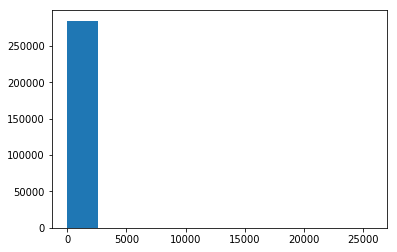

In [22]:
plt.hist(card_df['Amount'])

In [23]:
np.log([0, 1, 100, 1000])

C:\ProgramData\Anaconda3\envs\python_edu\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([      -inf, 0.        , 4.60517019, 6.90775528])

In [24]:
np.log1p([-1, 0, 1, 99, 999])

C:\ProgramData\Anaconda3\envs\python_edu\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log1p
  """Entry point for launching an IPython kernel.


array([      -inf, 0.        , 0.69314718, 4.60517019, 6.90775528])

(array([3.6737e+04, 3.8948e+04, 6.3477e+04, 5.8125e+04, 5.0635e+04,
        2.5787e+04, 9.0710e+03, 1.8090e+03, 2.1000e+02, 8.0000e+00]),
 array([ 0.        ,  1.01539412,  2.03078823,  3.04618235,  4.06157647,
         5.07697058,  6.0923647 ,  7.10775882,  8.12315293,  9.13854705,
        10.15394117]),
 <a list of 10 Patch objects>)

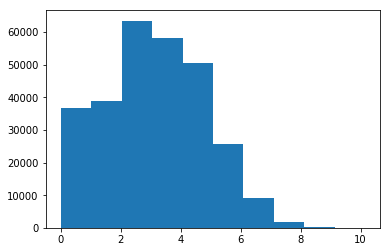

In [25]:
# 넘파이의 log1p를 이용해 Amount 로그 변환.

df_copy02 = df_copy.copy()
amount_n = np.log1p(df_copy02['Amount'])
df_copy02.insert(0, 'Amount_scaled', amount_n)
df_copy02.drop(['Amount'], axis=1, inplace=True)
plt.hist(df_copy02['Amount_scaled'])

In [26]:
X_features = df_copy02.iloc[:, :-1]
y_target = df_copy02.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                     test_size=0.3, stratify=y_target)

dt_clf = dt_clf.fit(X_train, y_train)

dt_prediction = dt_clf.predict(X_test)

print(confusion_matrix(y_test, dt_prediction))

accuracy = accuracy_score(y_test, dt_prediction)
precision = precision_score(y_test, dt_prediction)
recall = recall_score(y_test, dt_prediction)
f1 = f1_score(y_test, dt_prediction)
roc_auc = roc_auc_score(y_test, dt_prediction)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'
      .format(accuracy, precision, recall, f1, roc_auc))

[[85253    42]
 [   44   104]]
accuracy: 0.9990, precision: 0.7123, recall: 0.7027, F1: 0.7075, AUC: 0.8511


In [27]:
# 이상치 데이터 제거 후 모델 학습, 예측, 평가

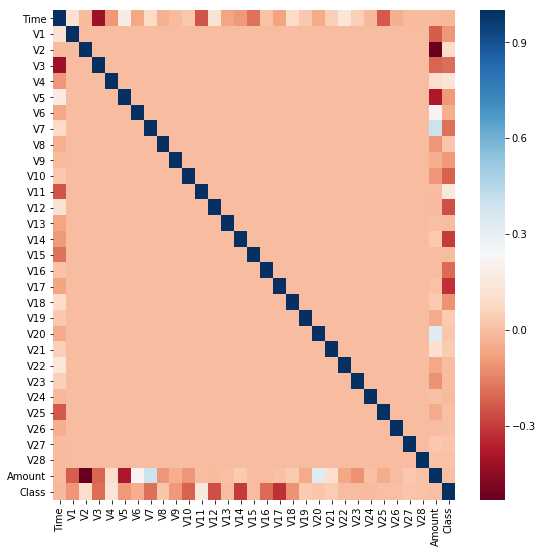

In [28]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [29]:
# fraud에 해당하는 column 데이터만 추출, 1사분위와 3사분위 지점을 np.percentile로 구함

fraud = card_df[card_df['Class']==1]['V14']
fraud

541       -4.289254
623       -1.692029
4920      -1.470102
6108      -6.771097
6329      -6.079337
6331     -10.691196
6334     -10.733854
6336      -9.177166
6338      -9.252307
6427      -6.210258
6446      -6.763334
6472      -5.249305
6529      -6.608068
6609      -6.590550
6641      -9.057993
6717     -11.736729
6719     -11.543498
6734      -7.678668
6774      -7.019902
6820      -7.506169
6870      -7.417712
6882      -9.405423
6899     -10.924187
6903     -10.860698
6971      -3.738023
8296     -19.214325
8312      -9.634690
8335     -14.690729
8615     -18.822087
8617      -9.440375
            ...    
251891    -2.757557
251904    -8.560423
252124   -12.456706
252774   -12.156587
254344    -1.816384
254395     0.141332
255403    -8.229952
255556   -10.149813
258403    -4.566010
261056    -6.065622
261473    -6.034403
261925    -5.926131
262560   -11.081617
262826   -13.202505
263080    -1.422064
263274   -13.010749
263324    -4.287996
263877    -8.388443
268375    -2.901190


In [30]:
quantile_25 = np.percentile(fraud.values, 25)
quantile_75 = np.percentile(fraud.values, 75)

# IQR 구하고, 1.5배 하여 max min 지점 구함

iqr = quantile_75 - quantile_25
iqr_weight = iqr * 1.5

lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight

# 최대값보다 크거나, 최소값보다 작은 값을 outlier로 설정, df index 반환

outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index

In [31]:
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [32]:
df_copy02.drop(outlier_index, axis=0, inplace=True)

In [33]:
X_features = df_copy02.iloc[:, :-1]
y_target = df_copy02.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                     test_size=0.3, stratify=y_target)

dt_clf = dt_clf.fit(X_train, y_train)

dt_prediction = dt_clf.predict(X_test)

print(confusion_matrix(y_test, dt_prediction))

accuracy = accuracy_score(y_test, dt_prediction)
precision = precision_score(y_test, dt_prediction)
recall = recall_score(y_test, dt_prediction)
f1 = f1_score(y_test, dt_prediction)
roc_auc = roc_auc_score(y_test, dt_prediction)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'
      .format(accuracy, precision, recall, f1, roc_auc))

[[85270    25]
 [   40   106]]
accuracy: 0.9992, precision: 0.8092, recall: 0.7260, F1: 0.7653, AUC: 0.8629


In [ ]:
# SMOTE over sampling 적용 후 모델 학습, 예측, 평가

In [34]:
from imblearn.over_sampling import SMOTE

In [36]:
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 1    199020
0    199020
dtype: int64


In [37]:
dt_clf = dt_clf.fit(X_train_over, y_train_over)
dt_prediction = dt_clf.predict(X_test)
print(confusion_matrix(y_test, dt_prediction))

[[85130   165]
 [   36   110]]


In [38]:
accuracy = accuracy_score(y_test, dt_prediction)
precision = precision_score(y_test, dt_prediction)
recall = recall_score(y_test, dt_prediction)
f1 = f1_score(y_test, dt_prediction)
roc_auc = roc_auc_score(y_test, dt_prediction)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'
      .format(accuracy, precision, recall, f1, roc_auc))

accuracy: 0.9976, precision: 0.4000, recall: 0.7534, F1: 0.5226, AUC: 0.8757
